In [1]:
##This is a Jupyter notebook for Linear Algebra HW. 
##Belongs to Divya E. Vernerey
##November 2023

## Least Squares Solutions

In this problem set we address the problem of inconsistent systems, and the common resolution known as the least squares solution.

In the case that $AX=B$ is inconsistent, there is no vector $X$ such that the two vectors $AX$ and $B$ are the same.  A natural idea then is to choose a vector $X$ such that $AX$ and $B$ are as close as possible.  To do this we define the error vector $E=AX-B$, and choose the $X$ that minimizes the length $||E||$.  This choice of $X$ is known as the **least squares solution** to the system $AX=B$, and we will assign it the symbol $\hat{X}$.  The linear algebra approach to this formulation of the problem requires inner products and projections.  We will first give the solution to the least squares problem and provide only a visual explanation.  After some examples, we will give a more rigorous explanation.  

Recall that if the system $AX=B$ is inconsistent, the vector $B$ is not in $\mathcal{Col}(A)$, the column space of $A$.  **The error vector $E=AX-B$ has minimum magnitude exactly when it is orthogonal to $\mathcal{Col}(A)$**.  We can easily visualize this in the case that $\mathcal{Col}(A)$ as a one-dimensional subspace of $\mathbb{R}^2$.

### Example 1:  Two inconsistent equations

Let's consider a simple example of an inconsistent system $AX=B$, where $A$ is a $2\times 2$ matrix.

$$
\begin{equation}
\left[\begin{array}{rr} 3 & 9 \\ 1 & 3 \end{array}\right]X = \left[\begin{array}{r} 2 \\ 4 \end{array}\right]    
\end{equation}
$$

In this example, the second column of $A$ is a multiple of the first, so $\mathcal{Col}(A)$ is a one-dimensional space that contains only multiples of these vectors.  Since $B$ is not a multiple of either column, $B$ is not in $\mathcal{Col}(A)$.

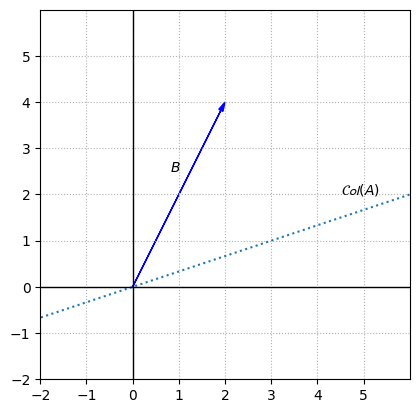

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-6,6,100)

fig, ax = plt.subplots()

options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,4,fc='b',ec='b',**options)
ax.plot(x,x/3,ls=':')


ax.set_xlim(-2,6)
ax.set_ylim(-2,6)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-2,6,step = 1))
ax.set_yticks(np.arange(-2,6,step = 1))

ax.text(0.8,2.5,'$B$')
ax.text(4.5,2,'$\mathcal{Col}(A)$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

Let's look at the relationship between $AX$, $B$, and $E$ for an arbitrary vector $X$ in $\mathbb{R}^2$.

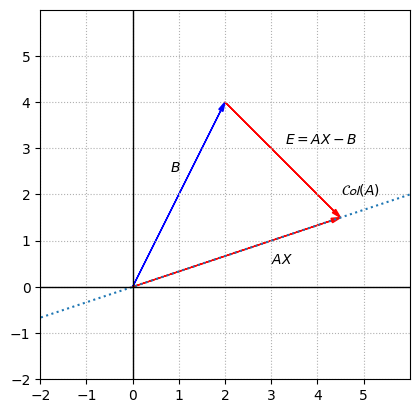

In [3]:
fig, ax = plt.subplots()

options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,4,fc='b',ec='b',**options)
ax.arrow(0,0,4.5,1.5,fc='r',ec='r',**options)
ax.arrow(2,4,2.5,-2.5,fc='r',ec='r',**options)
ax.plot(x,x/3,ls=':')

ax.set_xlim(-2,6)
ax.set_ylim(-2,6)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-2,6,step = 1))
ax.set_yticks(np.arange(-2,6,step = 1))

ax.text(0.8,2.5,'$B$')
ax.text(4.5,2,'$\mathcal{Col}(A)$')
ax.text(3,0.5,'$AX$')
ax.text(3.3,3.1,'$E=AX-B$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

We can see that $||E||$ is a measure of the distance between $B$ and a vector in $\mathcal{Col}(A)$, and that $||E||$ will be minimized if we choose $X$ so that $E$ is orthogonal to $\mathcal{Col}(A)$.  This is the least squares solution we refer to as $\hat{X}$.  The closest vector in $\mathcal{Col}(A)$ to $B$ is the *orthogonal projection* of $B$ onto $\mathcal{Col}(A)$.  We will use the notation $\hat{B}$ for this projection so that we now have $A\hat{X}=\hat{B}$. 

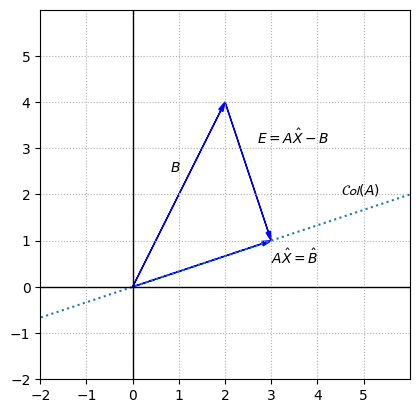

In [4]:
fig, ax = plt.subplots()

options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,4,fc='b',ec='b',**options)
ax.arrow(0,0,3,1,fc='b',ec='b',**options)
ax.arrow(2,4,1,-3,fc='b',ec='b',**options)
ax.plot(x,x/3,ls=':')

ax.set_xlim(-2,6)
ax.set_ylim(-2,6)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-2,6,step = 1))
ax.set_yticks(np.arange(-2,6,step = 1))

ax.text(0.8,2.5,'$B$')
ax.text(4.5,2,'$\mathcal{Col}(A)$')
ax.text(3,0.5,'$A\hat{X}=\hat{B}$')
ax.text(2.7,3.1,'$E=A\hat{X}-B$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

In this example, we can use the projection formula to calculate $E$ and $\hat{B}$

$$
\begin{equation}
E = \left[ \begin{array}{r} 1 \\ -3 \end{array} \right] \hspace{2cm} 
\hat{B} = \left[ \begin{array}{r} 3 \\ 1 \end{array} \right]
\end{equation}
$$

To find $\hat{X}$, we solve the system $A\hat{X}=\hat{B}$

$$
\begin{equation}
\left[\begin{array}{rr} 3 & 9 \\ 1 & 3 \end{array}\right]\hat{X} = \left[\begin{array}{r} 3 \\1 \end{array}\right]    
\end{equation}
$$

In this system, the second equation is just a multiple of the first.  This means that $x_1+3x_2 = 1$ is the only constraint on the unknowns, and that we can take $x_2$ to be a free variable.  If we assign $x_2$ a parameter, $s$, we can describe all possible solutions as follows.

$$
\begin{eqnarray*}
x_1 & = & 1-3s \\
x_2 & = & s
\end{eqnarray*}
$$

In this particular example, which is meant to show a clear picture of $E$, there is not a unique least squares solution since many vectors solve the matrix equation $A\hat{X}=\hat{B}$.  Inconsistent systems that arise in applications typically do have a unique least squares solution.   

### Normal equations

If we assume for now that the error $E=AX-B$ will have minimum magnitude when it is orthogonal to the column space of $A$, we can use our knowledge of the fundamental subspaces to solve the least squares problem when the column space is of higher dimension.  Recall that any vector orthogonal to $\mathcal{Col}(A)$ must lie in $\mathcal{Nul}(A^T)$, the null space of $A^T$.  This means that $A^TE=0$ for the least squares solution.  Filling in $E=AX-B$ gives us the system $A^T(AX-B)=0$, which can be written as $A^TAX=A^TB$.  This system of equations is referred to as the **normal equations**.

### Example 2:  Four inconsistent equations

Although the method of least squares can be applied to any inconsistent system, it is usually associated with systems that have more equations than unknowns.  These systems are called overdetermined, and here is one such example.

$$
\begin{eqnarray*}
2x_1 + x_2 & = & 0 \\
2x_1 - x_2 & = & 2 \\
3x_1 + 2x_2 & = & 1 \\
5x_1 + 2x_2 & = & -2
\end{eqnarray*}
$$

Let $A$ be the $4\times 2$ coefficient matrix, and let $B$ be the vector of the right-hand sides of the equations.  To verify that the system is indeed inconsistent, we can compute the RREF of the augmented matrix $\left[A|B\right]$.

In [5]:
import laguide as lag

A_augmented = np.array([[2, 1, 0],[2, -1, 2],[3, 2, 1],[5,2, -2]])
A_reduced = lag.FullRowReduction(A_augmented)
print(A_reduced)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


The pivot in the last column indicates that the system is inconsistent.  The two columns of $A$ are linearly independent and form a basis for $\mathcal{Col}(A)$, which is a two-dimensional subspace of $\mathbb{R}^4$, but $B$ does not lie in this subspace.  

To find the least squares solution, we will construct and solve the normal equations, $A^TAX = A^TB$.

In [6]:
import laguide as lag

A = np.array([[2, 1],[2, -1],[3, 2],[5,2]])
B = np.array([[0],[2],[1],[-2]])

# Construct A^TA
N_A = A.transpose()@A
# Construct A^TA
N_B = A.transpose()@B
print(N_A,'\n')
print(N_B)


[[42 16]
 [16 10]] 

[[-3]
 [-4]]


The normal equations are a $2\times 2$ system, which can be solved using elimination.


$$
\begin{eqnarray*}
42x_1 + 16x_2 & = & -3 \\
16x_1 + 10x_2 & = & -4 
\end{eqnarray*}
$$


In [7]:
X_hat = lag.SolveSystem(N_A,N_B)
print(X_hat)
print('\n')
E = A@X_hat - B
print("Magnitude of minimum error is:",lag.Magnitude(E))

[[ 0.20731707]
 [-0.73170732]]


Magnitude of minimum error is: 2.5874933722078426


In this example, there is a unique vector $\hat{X}$ that minimizes the length $||E||$.  Remember from the previous example that $\hat{X}$ is the vector such that $A\hat{X}=\hat{B}$, where $\hat{B}$ is the orthogonal projection of $B$ onto $\mathcal{Col}(A)$.  Note however that when we find the solution using the normal equations, we do not actually need to compute $\hat{B}$.

We have not provided proof yet that $\hat{X}$ minimizes the length $||E||$, but we could provide some numerical evidence by computing $||E||$ for other vectors that are "near" $\hat{X}$.  For example, we might compute the length $||E||$ for a vector $X$ that has components that are within one of $\hat{X}$.  We will use the $\texttt{random}$ module to generate a typical vector.

In [8]:
P = np.random.rand(2,1)
X = X_hat + P
print(X)
E = A@X - B
print("Magnitude of error is:",lag.Magnitude(E))

[[ 1.19822063]
 [-0.22455382]]
Magnitude of error is: 8.16013657475869


Running the code in this cell does not prove that $||E||$ is at minimum for $X=\hat{X}$, even if we were to put it in a loop and execute it a million times (we will prove it soon).  It does allows us to demonstrate some evidence to augment our reasoning.  Another thing we might do to gather evidence is let $X= \delta P$, and plot $||E||$ as a function of $\delta,$ a relatively small number.

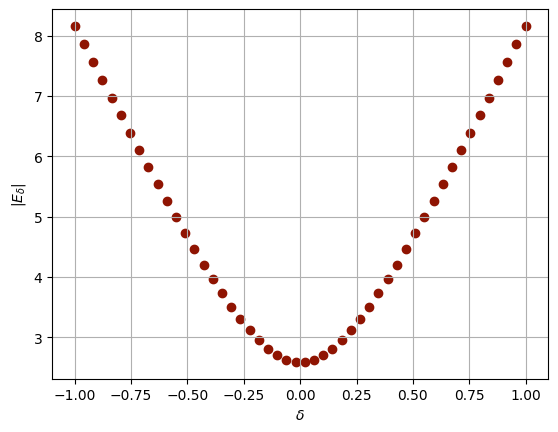

In [9]:
## Set the number of vectors to be tested.
N = 50

delta = np.linspace(-1,1,N)
E_delta = np.linspace(-1,1,N)

## P is the random vector defined in the previous cell.  
## The output of this cell will change with each execution of the previous cell.

for i in range(N):
    X = X_hat + delta[i]*P
    E_delta[i] = lag.Magnitude(A@X-B)
    

fig, ax = plt.subplots()
ax.scatter(delta,E_delta,color='xkcd:brick red');
ax.set_xlabel('$\delta$')
ax.set_ylabel('$|E_{\delta}|$');
ax.grid(True)

### Best approximation

Although numerical evidence and the plot of $B$, $\hat{B}$, and $E$ may convince us that $||E||$ is minimum when $E$ and $\hat{B}$ are orthogonal, we have not yet given proof of the fact.  To accomplish this, we need to show that $||B-Y|| \ge ||B-\hat{B}||$ where $Y$ is an arbitrary vector in $\mathcal{Col}(A)$.  This can be explained using properties of the dot product.  

$$
\begin{eqnarray*}
||B-Y||^2 & = & ||(B-\hat{B}) + (\hat{B}-Y)||^2 \\
 & = & \left((B-\hat{B}) + (\hat{B}-Y)\right) \cdot \left((B-\hat{B}) + (\hat{B}-Y)\right) \\
 & = & (B-\hat{B})\cdot (B-\hat{B}) + 2(\hat{B}-Y) \cdot (B-\hat{B}) + (\hat{B}-Y)\cdot(\hat{B}-Y) \\
 & = & ||B-\hat{B}||^2 + ||\hat{B}-Y||^2 \\
 & \ge & ||B-\hat{B}||^2
\end{eqnarray*}
$$

The first key fact is that $(\hat{B}-Y)$ is in $\mathcal{Col}(A)$ so $(\hat{B}-Y) \cdot (B-\hat{B}) = 0$.  We also need to observe that magnitudes of vectors can never be negative since they are sums of squares.  Indeed, the only vector with magnitude zero is the vector with all zero entries.  In particular, this means that $||\hat{B}-Y||^2 \ge 0$. 

###  QR factorization to solve normal equations

In this final example, we consider making use of the $QR$ factorization to solve the normal equations.  If we insert $A=QR$ into the normal equations $A^TAX=A^TB$, we will see a simplification.

$$
\begin{eqnarray*}
(QR)^T(QR)X & = & (QR)^TB \\
R^TQ^TQRX & = & R^TQ^TB  \\
R^TRX & = &  R^TQ^TB \\
RX & = & Q^TB
\end{eqnarray*}
$$

The system $RX=Q^TB$ is triangular and can be solved with back substitution.  Note that this approach replaces elimination ($LU$ factorization) with $QR$ factorization.

In [10]:
Q,R = lag.QRFactorization(A)
QTB = Q.transpose()@B
X_hat = lag.BackSubstitution(R,QTB)
print(X_hat)

[[ 0.20731707]
 [-0.73170732]]


### Exercises

**Exercise 1:** How does the parabolic graph (above), that is, the plot of $||E||$ as a function of $\delta,$ demonstrate that $X=\hat{X}$ is the "best" vector such that $A\hat{X}$ and $B$ are as close as possible ?

The graph is a parabola and $\hat{x}$ is where the vertex is. This shows that this is the shortest one possible out of the other possible solutions.

**Exercise 2:** Verify that the following system is inconsistent, then find the least squares solution.

$$
\begin{eqnarray*}
    x_2 + x_3 & = & 3 \\
3x_1 - x_2 - 2x_3 & = & 2 \\
x_1 - 2x_2 - x_3 & = & 1 \\
4x_1 + 2x_2 + 4x_3 & = & 0
\end{eqnarray*}
$$

In [11]:
## Code solution here.

A_augmented = np.array([[0,1,1,3],[3,-1,-2,2],[1,-2,-1,1],[4,2,4,0]])
A_reduced = lag.FullRowReduction(A_augmented)
print(A_reduced)
print(("We see that we got 0 = 1, which shows that this is inconsistent. \nNow we find the Least Squares solution"))
A = np.array([[0,1,1],[3,-1,-2],[1,-2,-1],[4,2,4]])
B = np.array([[3],[2],[1],[0]])

N_A = A.transpose()@A
N_B = A.transpose()@B
X_hat = lag.SolveSystem(N_A,N_B)
print(N_A,'\n')
print(N_B,'\n')
print("Now solve the system of equations:", '\n')

print(X_hat,'\n')
E = A@X_hat - B
print("Magnitude of minimum error is:",lag.Magnitude(E))


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
We see that we got 0 = 1, which shows that this is inconsistent. 
Now we find the Least Squares solution
[[26  3  9]
 [ 3 10 13]
 [ 9 13 22]] 

[[ 7]
 [-1]
 [-2]] 

Now solve the system of equations: 

[[ 0.4       ]
 [ 0.47843137]
 [-0.5372549 ]] 

Magnitude of minimum error is: 3.256366313642777


**Exercise 3:** Another way find the least squares solution to an inconsistent system is to find $\hat{B}$ by projecting $B$ onto $\mathcal{Col}(A)$ and then solving $A\hat{X}=\hat{B}$ directly.    Demonstrate the entire calculation using $A$ and $B$ from **Example 2** (not Exercise 2).

In [12]:
A = np.array([[2,1],[2,-1],[3,2],[5,2]])
B = np.array([[0],[2],[1],[-2]])
A_reduced = lag.FullRowReduction(A)
print(A_reduced)

[[1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]]


We see that there is a pivot in every column so columns of A are linearly independent and forms a basis for C(A). \
Now we find the orthogonal basis:

In [13]:
A1 = np.array([[2],[2],[3],[5]])
A2 = np.array([[1],[-1],[2],[2]])

m = (lag.DotProduct(A1,A2)/lag.DotProduct(A2,A2))*A2
E = A1 - m
print(E, '\n')
print("Now we find projection of B in direction of basis elements and add.")
B_hat = (lag.DotProduct(B,A2)/lag.DotProduct(A2,A2))*A2 + (lag.DotProduct(B,E)/lag.DotProduct(E,E))*E
print(B_hat, '\n', "Now solve A \hat{x} = \hat{b}, then RREF")
C = np.hstack([A,B_hat])
print(lag.FullRowReduction(C))

[[ 0.4]
 [ 3.6]
 [-0.2]
 [ 1.8]] 

Now we find projection of B in direction of basis elements and add.
[[-0.31707317]
 [ 1.14634146]
 [-0.84146341]
 [-0.42682927]] 
 Now solve A \hat{x} = \hat{b}, then RREF
[[ 1.          0.          0.20731707]
 [ 0.          1.         -0.73170732]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]


Thus we find that $\hat{x} = \begin{bmatrix}0.20731707\\ -0.73170732 \end{bmatrix}$

**Exercise 4:** Explain why an inconsistent system, $AX=B$, does not have a unique least squares solution if the columns of $A$ are linearly dependent.

When the coluns of A are linearly dependent, then there exists some nonzero x that Ax = 0.\
When we have $A^TAx = A^T0 = 0$ then the columns of $A^TA$ must be linearly dependent


Now since A has linearly dependent columns, X isn't unqiue anymore since there are multiple solutions that lead to the same B.\
We can show this $AX = B$ has a unique solutions if the columns of A are linearly independent.\
Therefore we see that $A^TAX = A^TB$ doesn't have a unique solution. 

**Exercise 5:** Demonstrate that the following inconsistent system does not have a unique least squares solution.


$$
\begin{eqnarray*}
    x_2 - x_3 & = & 3 \\
3x_1 - x_2 + 4x_3 & = & 2 \\
x_1 - 2x_2 + 3x_3 & = & 1 \\
4x_1 + 2x_2 + 2x_3 & = & 0
\end{eqnarray*}
$$

In [14]:
A = np.array([[0,1,-1],[3,-1,4],[1,-2,3],[4,2,2]])
B = np.array([[3],[2],[1],[0]])
N_A = A.transpose()@A
N_B = A.transpose()@B
reduce = lag.FullRowReduction(np.hstack([N_A,N_B]))
print(reduce)

[[ 1.          0.          1.          0.29083665]
 [ 0.          1.         -1.         -0.187251  ]
 [ 0.          0.          0.          0.        ]]


We see that the systems doesn't have any pivots in the third column which shows that there exists a free variable. Thus we can see that there will be an infinite number of solutions.

**Exercise 6:** If the system $AX = B$ is inconsistent, find the least squares solution to it and determine whether or not the least squares solution is unique.


$$
\begin{equation}
A = \left[\begin{array}{rr} 1 & 2 & 3 \\ 1 & 1 & 1 \\ 2 & 2 & 0 \\ 1 & 2 & 1 \end{array}\right]
\quad\quad
B = \left[\begin{array}{r} 1 \\1 \\ 1 \\ 1 \end{array}\right]  
\end{equation}
$$

In [15]:
## Code solution here
A_augmented = np.array([[1,2,3,1],[1,1,1,1],[2,2,0,1],[1,2,1,1]])
A_reduced = lag.FullRowReduction(A_augmented)

print( A_reduced, '\n')
print("We see that the system is inconsistent.")

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 

We see that the system is inconsistent.


Now we find the least squares solution by using normal equations:

In [16]:
A = np.array([[1,2,3],[1,1,1],[2,2,0],[1,2,1]])
B = np.array([[1],[1],[1],[1]])

N_A = A.transpose()@A
N_B = A.transpose()@B
Reduce = lag.FullRowReduction(np.column_stack((N_A, N_B)))
print(Reduce)

[[1.         0.         0.         0.42857143]
 [0.         1.         0.         0.14285714]
 [0.         0.         1.         0.14285714]]


**Exercise 7:** Find the equation of the **line** that best fits through the three given points:  $(0,2), (0,3)$ and $(1,4)$ in the sense of least squares.

\begin{align*}
m(0)  + b &= 2\\
m(0)  + b &= 3\\
m(1)  + b &= 4\\
\end{align*}


In [17]:
A = np.array([[0, 1],[0, 1],[1, 1]])
B = np.array([[2],[3],[4]])
N_A = A.transpose()@A
N_B = A.transpose()@B
Reduce = lag.FullRowReduction(np.column_stack((N_A, N_B)))
print(Reduce)

[[1.  0.  1.5]
 [0.  1.  2.5]]


We see that the equation is $y = 1.5x + 2.5$

**Exercise 8:** Find the equation of the **parabola** that best fits through the given points: $(-1,2), (1,0), (3,1)$ and $(4,2)$ in the sense of least squares.

We have the equation of the parabola: $y = ax^2 + bx + c$

\begin{align*} 
a - b + c & = 2\\
a + b + c & = 0\\
9a  + 3b + c & = 1\\
16a + 4b + c & = 2\\
\end{align*}

Now we determine if system is consistent:

In [18]:
Augment = np.array([[1, -1, 1, 2],[1,1,1,0],[9,3,1,1],[16,4, 1, 2]])
A_reduce = lag.FullRowReduction(Augment)
print( A_reduce, '\n')
print("We see the system is inconsistent \n Now find solution:")
A = np.array([[1, -1, 1],[1, 1, 1],[9, 3, 1],[16, 4, 1]])
B = np.array([[2],[0],[1],[2]])
N_A = A.transpose()@A
N_B = A.transpose()@B
Reduce = lag.FullRowReduction(np.column_stack((N_A, N_B)))
print(Reduce)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 

We see the system is inconsistent 
 Now find solution:
[[ 1.          0.          0.          0.31532663]
 [ 0.          1.          0.         -0.91834171]
 [ 0.          0.          1.          0.72864322]]


We see that the equation will be:
$y = 0.31532663x^2 + (-0.91834171)x + 0.72864322$

**Exercise 9:** Find the least squares solution for the given system $AX = B$ without using the Normal equation. Instead, find the orthogonal projection of $B$ onto $\mathcal{Col}(A)$ to find the least squares solution. Is the solution unique?

$$
\begin{equation}
A = \left[\begin{array}{rr} 1 & 2 & 2 \\ 2 & 1 & 4 \\ 1 & 2 & 2 \end{array}\right]
\quad\quad
B= \left[\begin{array}{r} 1 \\1 \\ 2 \end{array}\right] 
\end{equation}
$$

In [19]:
A = np.array([[1,2,2],[2,1,4],[1,2,2]])
A_reduce = lag.FullRowReduction(A)
print(A_reduce)

[[1. 0. 2.]
 [0. 1. 0.]
 [0. 0. 0.]]


We see that there is no pivot on the third column since we have infinitely any least square solutions for the system. Gran-Schmidt only takes a finite, linearly independent set of vectors.

Since there are two pivots of A, 
The basis for C(A) is $\{C_1,C_2\}$


Where C_1 and C_2 is equal to:

$C_1 = \begin{bmatrix} 1\\2\\1\\ \end{bmatrix}$
$C_2 = \begin{bmatrix} 2\\1\\2\\ \end{bmatrix}$

In [20]:
B = np.array([[1],[1],[2]])
C_1 = np.array([[1],[2],[1]])
C_2 = np.array([[2],[1],[2]])

V_1 = C_1
V_2 = C_2 - (lag.DotProduct(V_1, C_2)/lag.DotProduct(V_1,V_1))*V_1


U_1 = V_1/np.math.sqrt(lag.DotProduct(V_1,V_1))
U_2 = V_2/np.math.sqrt(lag.DotProduct(V_2, V_2))
# Projection of B onto C(A)
B_proj = lag.DotProduct(B, U_1)*U_1 + lag.DotProduct(B, U_2)*U_2

print(U_1,'\n')
print(U_2,'\n')
print(B_proj,'\n')

[[0.40824829]
 [0.81649658]
 [0.40824829]] 

[[ 0.57735027]
 [-0.57735027]
 [ 0.57735027]] 

[[1.5]
 [1. ]
 [1.5]] 



Now we solve:

$\begin{bmatrix}
1&2&2\\2&1&4\\1&2&2\\
\end{bmatrix} \hat{x}
=
\begin{bmatrix} 1.5\\1\\1.5\\ \end{bmatrix}$

In [21]:
A = np.array([[1,2,2,1.5],[2,1,4,1],[1,2,2,1.5]])
A_reduce = lag.FullRowReduction(A)

print(A_reduce, '\n')

[[1.         0.         2.         0.16666667]
 [0.         1.         0.         0.66666667]
 [0.         0.         0.         0.        ]] 



We see that c is a free variable.

Let c = t now we can paramaterize:

$\hat{x} = \begin{bmatrix}0.167 \\ 0.67\\ 0 \end{bmatrix} + t \begin{bmatrix}-2 \\ 0\\ 1 \end{bmatrix}$

Thus we can see that there are infinitely many solutions for $A\hat{x} = \hat{B}$, thus the solution is not unqiue.

**Exercise 10:** Can you use $QR$ factorization in **Exercise 8** to solve the normal equation ? Explain.

In [22]:
A = np.array([[1, -1],[1, 1],[9, 3],[16, 4]])
B = np.array([[1],[1],[1],[1]])
reduce = lag.FullRowReduction(np.column_stack((A, B)))
print(reduce)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


From Question 7, we see the matrix equation:

$A = \begin{bmatrix}
1&-1&1\\
1&1&1\\
9&3&1\\
16&4&1\\
\end{bmatrix}$

From the above, we see that the RREF shows that they are linearly independent, as we have every pivot in every column which means that we are able to use QR factorization to solve the normal equation.